<a href="https://colab.research.google.com/github/GraceSigalla/DSCI-591-SNKG/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>DSCI 591: Data Science CAPSTONE 1</b>






#### Group 4

###  <b>Suicidal Behaviors in Adolescents</b>

In [7]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

# Ignore useless warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
from google.colab import files
uploaded = files.upload()

Saving GHSH_Pooled_Data1 copy.csv to GHSH_Pooled_Data1 copy (1).csv


In [9]:
#Change the file name variable to the name of your file
vfile1 = "capstonedata_2.csv"
vfile2 = "GHSH_Pooled_Data1 copy.csv"

## DATA LOADING

In [10]:
df = pd.read_csv(io.BytesIO(uploaded[vfile2]))
df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


Feature | Description
------- | -----------
Country   | Country the students are from
Year      | What year the students took the survey
Age Group       | Age group of students
Sex | Sex of students
Currently_Drink_Alcohol | Percentage of students who currently drank alcohol (at least one drink of alcohol on at least one day during the 30 days before the survey)
Really_Get_Drunk  | Percentage of students who ever drank so much alcohol that they were really drunk one or more times during their life
Overweight   | Percentage of students who were overweight (>+1SD from median for BMI by age and sex)
Use_Marijuana  | Percentage of students who ever used marijuana one or more times during their life
Have_Understanding_Parents   | Percentage of students who reported that their parents or guardians most of the time or always understood their problems and worries during the 30 days before the survey
Missed_classes_without_permission | Percentage of students who missed classes or school without permission on one or more days during the 30 days before the survey
Had_sexual_relation  | Percentage of students who are sexually active
Smoke_cig_currently | Percentage of students who currently smoked cigarettes (smoked cigarettes on at least 1 day during the 30 days before the survey)
Had_fights  | Percentage of students who were in a physical fight one or more times during the 12 months before the survey
Bullied | Percentage of students who were bullied on one or more days during the past 30 days
Got_Seriously_injured| Percentage of students who were seriously injured one or more times during the past 12 months
No_close_friends | Percentage of students who did not have any close friends
Attempted_suicide | Percentage of students who attempted suicide one or more times during the 12 months before the survey

In [11]:
df2 = df.copy()

## UNDERSTANDING THE DATA

In [12]:
df.shape

(106, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           106 non-null    object 
 1   Year                              106 non-null    int64  
 2   Age Group                         106 non-null    object 
 3   Sex                               106 non-null    object 
 4   Currently_Drink_Alcohol           106 non-null    float64
 5   Really_Get_Drunk                  106 non-null    float64
 6   Overwieght                        106 non-null    float64
 7   Use_Marijuana                     106 non-null    float64
 8   Have_Understanding_Parents        106 non-null    float64
 9   Missed_classes_without_permssion  106 non-null    float64
 10  Had_sexual_relation               106 non-null    float64
 11  Smoke_cig_currently               104 non-null    float64
 12  Had_figh

In [14]:
#checking for empty values
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 2
Had_fights                          0
Bullied                             4
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

DATA CLEANING

We can see that there are missing values in columns 'Smoke_cig_currently' and 'Bullied'. Given that the missing values are few, as a team we decided to replace them with the mean of the individual columns.


In [15]:
df['Bullied'] = df['Bullied'].fillna(df['Bullied'].mean())
df['Smoke_cig_currently'] = df['Smoke_cig_currently'].fillna(df['Smoke_cig_currently'].mean())

In [16]:
#Check null
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 0
Had_fights                          0
Bullied                             0
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA) AND DATA TRANSFORMATION

### Univarent Analysis

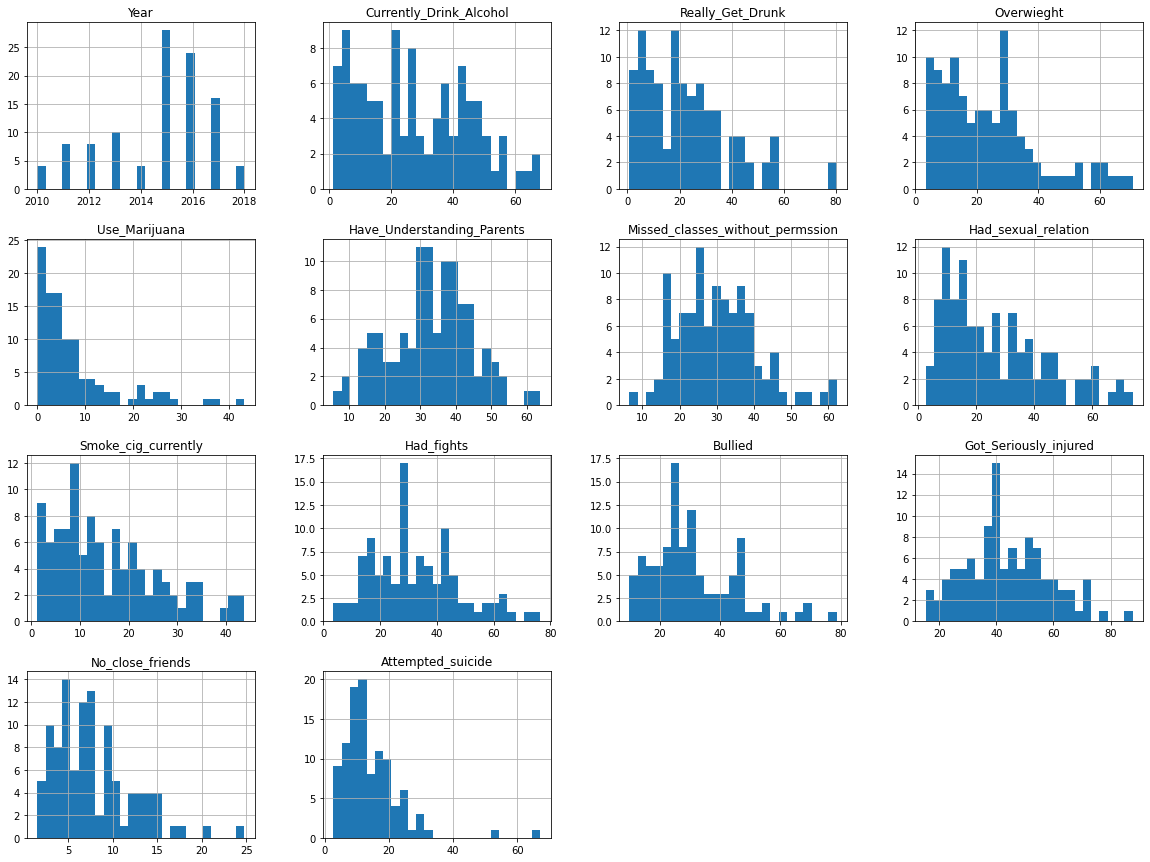

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=25, figsize=(20,15))
plt.show()

### Correlation Analysis

<ipython-input-18-20d91235dfc6>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


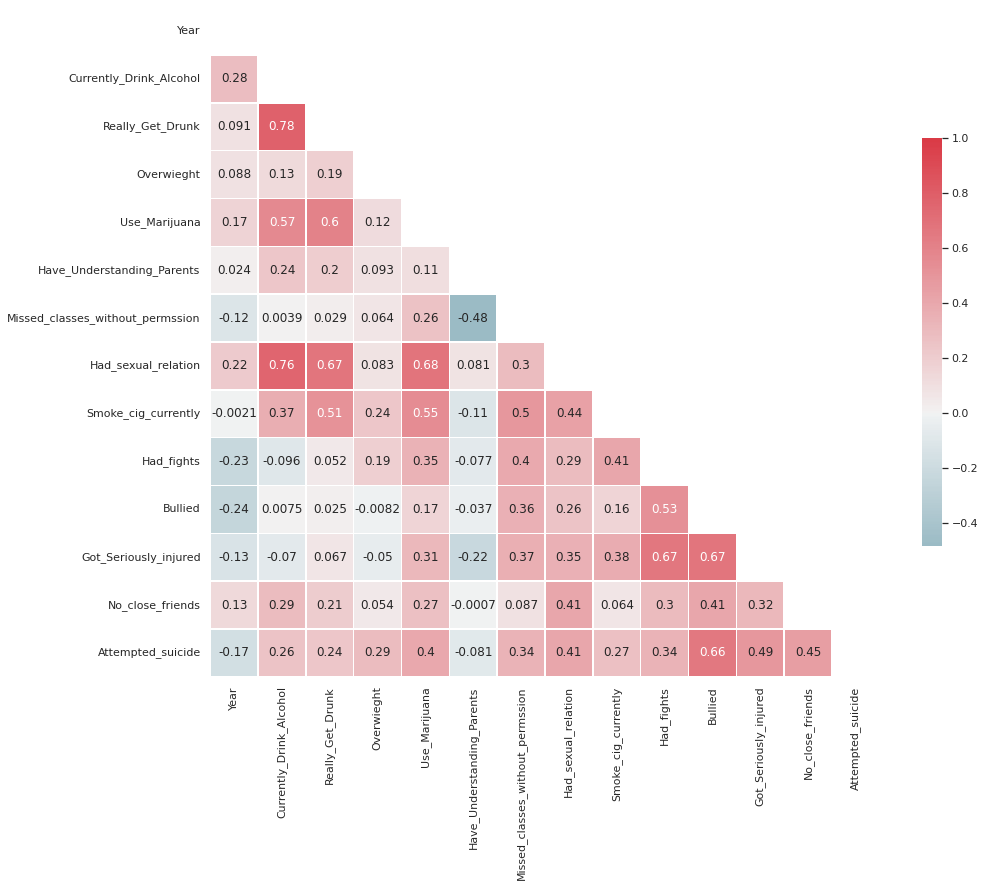

In [18]:
sns.set(style="white")
corr  = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Observation: There are no higly correlated pairs, and hence we do not have to drop any columns. We will continue to do analysis with all the columns.

### Unique Values

Lets see what are the unique values in features like Country, year and age group of adolescents.

In [19]:
def unique(cols):
    for col in cols:
        print ("\n Unique values - " + col + ":")
        print (df[col].unique())
        print ("Count:" + str(len(df[col].unique())))

In [20]:
unique(df[['Country','Year','Age Group','Sex']])


 Unique values - Country:
['Argentina' 'Barabados' 'Benin' 'Bhutan' 'Brunei Darussalam '
 'Dominican Republic ' 'Fiji Islands' 'Indonesia' 'Jamaica' 'Kiribati'
 'Laos' 'Malaysia' 'Mauritus' 'Mongolia' 'Namibia' 'Nepal' 'Peru' 'Samoa'
 'Seychelles' 'Suriname' 'Thailand' 'Timor-Leste ' 'Trinidad and Tobago '
 'Tuvalu ' 'Uruguay ' 'Vanuatu ' 'Wallis and Futuna ']
Count:27

 Unique values - Year:
[2018 2012 2011 2016 2014 2015 2017 2013 2010]
Count:9

 Unique values - Age Group:
['13-15' '16-17']
Count:2

 Unique values - Sex:
['Female' 'Male']
Count:2


For our analysis, we are looking at:

*   27 countries
*   9 years (2010-2018)
*   2 Age groups ('13-15' and '16-17')









We can replace the 2 age categories with 0 and 1 for the ease of working on the rest of the analysis.

1.   '13-15' --> 0
2.   '16-17' --> 1



In [21]:
# replaces age group ranges to numeric value
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Age Group'] = label.fit_transform(df['Age Group'])
df

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,0,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,31.109804,27.5,4.8,19.9
1,Argentina,2018,0,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,31.109804,37.4,5.5,10.4
2,Argentina,2018,1,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,31.109804,30.1,6.3,17.4
3,Argentina,2018,1,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,31.109804,40.3,6.6,11.2
4,Argentina,2012,0,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.100000,24.8,6.1,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Vanuatu,2011,0,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.500000,57.4,14.3,19.5
102,Wallis and Futuna,2015,0,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.200000,51.2,4.1,14.7
103,Wallis and Futuna,2015,0,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.900000,41.7,3.3,16.9
104,Wallis and Futuna,2015,1,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.600000,54.5,7.3,9.0


Analysis based on sex


In [22]:
df.groupby('Sex')[['Attempted_suicide']].mean()

,Attempted_suicide
Sex,
Female,15.122642
Male,13.783019


Observation: More females attempted_suicide by almost 2% higher compared to males

Analysis based on age group

In [23]:
df.groupby('Age Group')[['Attempted_suicide']].mean()

,Attempted_suicide
Age Group,
0,15.540323
1,12.920455


Age group 13-15 (denoted by 0) have a higher attempted suicide rate compared to age group 16-17

Analysis based on country

In [24]:
df.groupby('Country')[['Attempted_suicide']].mean().sort_values(by = "Attempted_suicide", ascending=False)

,Attempted_suicide
Country,
Samoa,34.383333
Kiribati,30.650000
Namibia,25.825000
Vanuatu,22.750000
Seychelles,18.000000
Jamaica,17.925000
Dominican Republic,17.200000
Peru,17.000000
Argentina,15.116667


We see that the 4 main countries with attempted suicide mean over 20 being Samoa with 34, followed by Kiribati with 31, then Namibia at Almost 26 and Vanuatu at almost 23. Then the lowest countries being Indonesia with 3.6, folowed by Laos with 5.

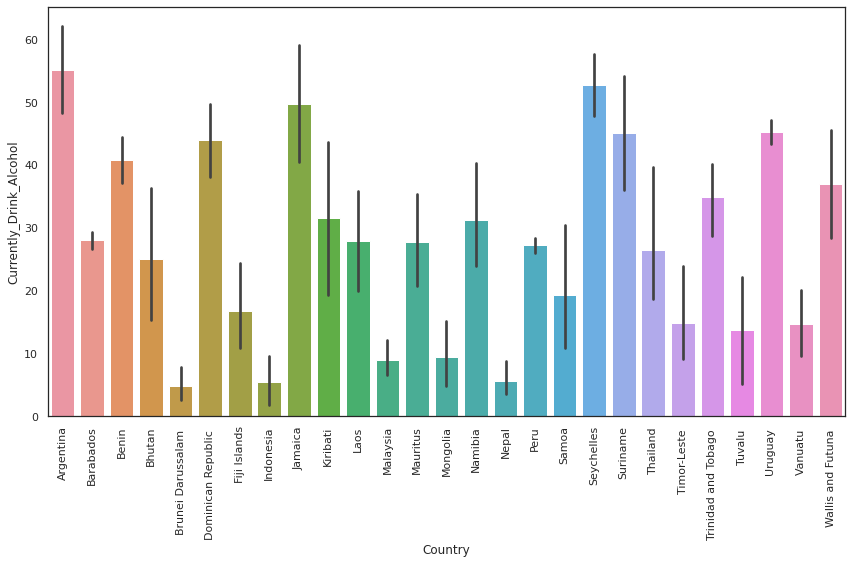

In [25]:
plt.figure(figsize = (12, 8))
sns.barplot(df.Country, df.Currently_Drink_Alcohol)
plt.xticks(rotation=90)
plt.tight_layout()

It is very evident from the graph that adolescents from Argentina, Seychelles and Jamaica indulged in alcohol more than any other country.

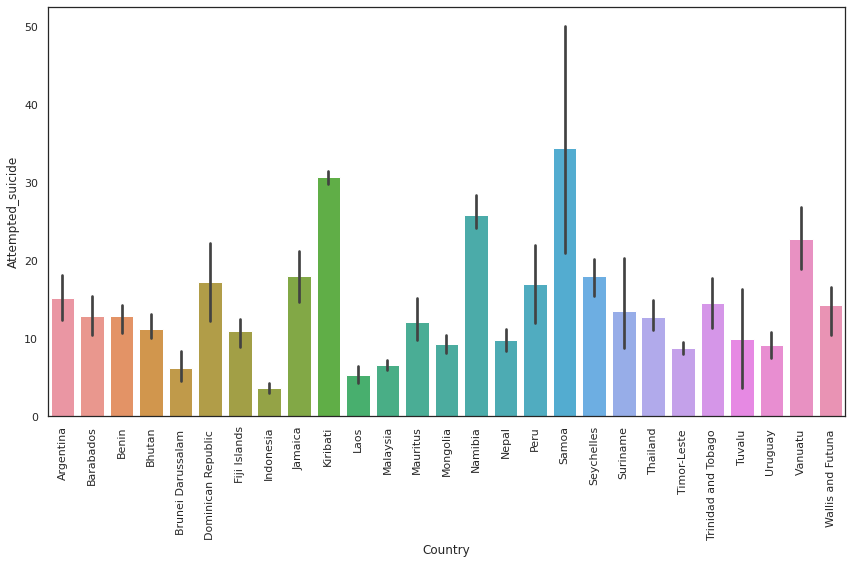

In [26]:
plt.figure(figsize = (12, 8))
sns.barplot(df.Country, df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Samoa, Kiribati, Namibia and Vanuatu seems to have very high rates of attemped suicides.

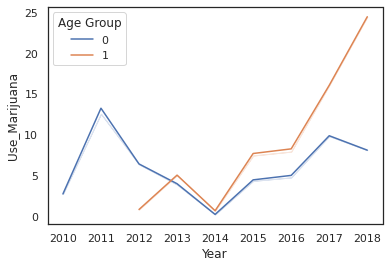

In [27]:
sns.lineplot(df.Year, df.Use_Marijuana, hue = df["Age Group"], ci = False)

When we look at the use of marijuana among the adolecsents, we can see a clear trend in teens of age group 16-17 idulging in marijuana from year 2012, which shoots up from 2016. As opposed to the age grouo of 13-15 which from 2010 had a higher increase in marijuana usage, which seemed to have reached a peak in 2011, before starting to decrease and then gain momentum from 2015 but at a slower rate compared to the age group of 16-17.

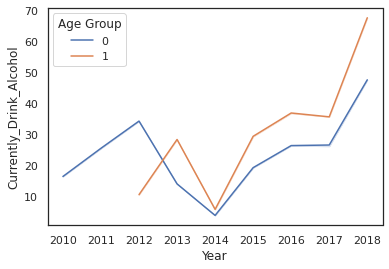

In [28]:
sns.lineplot(df.Year, df.Currently_Drink_Alcohol, hue = df["Age Group"], ci = False)

It was unexpected to see a higher proportion of adolescents in age group 13-15 indulging in the use of alcohol compared to age 16-17.

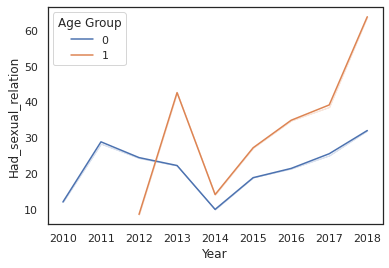

In [29]:
sns.lineplot(df.Year, df.Had_sexual_relation, hue = df["Age Group"], ci = False)

Age group 16-17 had a higher rate of involvement in sexual relations as the years progressed from 2012, and with more increments from 2014, which is really not as suprising for the age group.

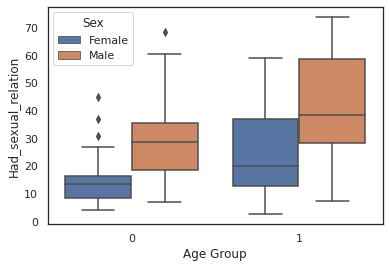

In [30]:
sns.boxplot("Age Group", "Had_sexual_relation", data = df, hue = "Sex")

It is observed that on average, males and those of the age group 16-17 had more secual relations compared to females.

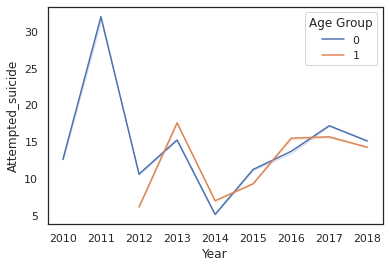

In [31]:
sns.lineplot(df.Year, df.Attempted_suicide, hue = df["Age Group"], ci = False)

It is observed that from the year 2010 to 2011, there was a huge spike in attempted suicide rates among adolecents in 13-15 age group, and again another spuke from 2014 to 2017 in the same age group. The 16-17 age group also had a spike from 2012 to 2013 which was slightly higher than that of 13-15 group. In summary, the age group of 13-15 had a higher attempted suicide rate overall.

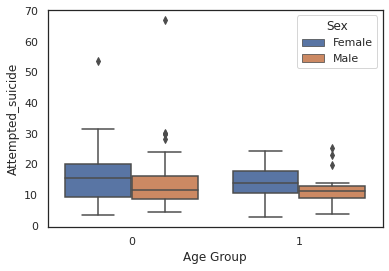

In [32]:
sns.boxplot("Age Group", "Attempted_suicide", data = df, hue = "Sex")

We can see that Females attemped suicides more than Men did.

**Diagnostic Analysis**

In [33]:
df.groupby(['Missed_classes_without_permssion','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

,,Attempted_suicide
Missed_classes_without_permssion,Bullied,
15.8,13.0,2.7
32.5,15.0,3.6
16.9,19.0,3.6
26.1,24.0,3.7
45.4,9.9,3.8
...,...,...
23.7,47.9,29.9
59.7,60.0,30.3
30.1,32.2,31.5


Those who had a higher rate of missed classes and got bullied a lot, had a higher chance of attempting suicide.

In [34]:
df.groupby(['No_close_friends','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

,,Attempted_suicide
No_close_friends,Bullied,
1.6,13.0,2.7
2.4,19.0,3.6
14.9,15.0,3.6
4.0,24.0,3.7
5.5,9.9,3.8
...,...,...
13.0,47.9,29.9
7.9,60.0,30.3
2.1,32.2,31.5


Those adolescents who got bullied the most and didnt have close friends, had a higher chance of attempting suicide.

In [35]:
df.groupby(['Overwieght','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

,,Attempted_suicide
Overwieght,Bullied,
13.1,13.0,2.7
14.9,19.0,3.6
52.2,15.0,3.6
12.6,24.0,3.7
10.3,9.9,3.8
...,...,...
6.3,47.9,29.9
12.8,60.0,30.3
46.4,32.2,31.5


If someone is overweight and gets bullied more, they have a higher chance of attempting suicide. However, it is also true if a person if bullied alot but not very overweight, they could also attempt suicide.

In [36]:
df.groupby(['Really_Get_Drunk','Had_fights'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

,,Attempted_suicide
Really_Get_Drunk,Had_fights,
1.1,7.0,2.7
0.8,13.1,3.6
2.9,65.8,3.6
12.7,23.5,3.7
34.0,6.4,3.8
...,...,...
26.7,44.0,29.9
15.1,54.4,30.3
10.4,28.5,31.5


Those who got really drunk and got into fights, had a higher chance of attempting suicide. Also, those who got into a lot more fights, had higher chances of attempting suicide.

In [37]:
df.groupby(['Currently_Drink_Alcohol','Smoke_cig_currently'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

,,Attempted_suicide
Currently_Drink_Alcohol,Smoke_cig_currently,
2.2,1.5,2.7
1.4,1.5,3.6
5.1,8.4,3.6
12.1,33.0,3.7
36.1,12.1,3.8
...,...,...
26.4,10.1,29.9
15.4,21.2,30.3
19.3,19.5,31.5


It is observed that those who are currently drink alcohol and smoking cigarates had a higher chance of attempting suicide.

In [38]:
df.groupby(['Had_fights','Have_Understanding_Parents'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

,,Attempted_suicide
Had_fights,Have_Understanding_Parents,
7.0,38.8,2.7
13.1,36.2,3.6
65.8,19.6,3.6
23.5,30.2,3.7
6.4,15.5,3.8
...,...,...
44.0,40.2,29.9
54.4,13.9,30.3
28.5,15.4,31.5


It is observed that those adolescents who got into more fights and didn't have understanding parents, had a higher chance of attempting suicide.

### <b>Attempted Suicide Rates > 20 %</b>

In [39]:
suicide20rate_df = df[df['Attempted_suicide'] > 20]
#need to label axis on graphs

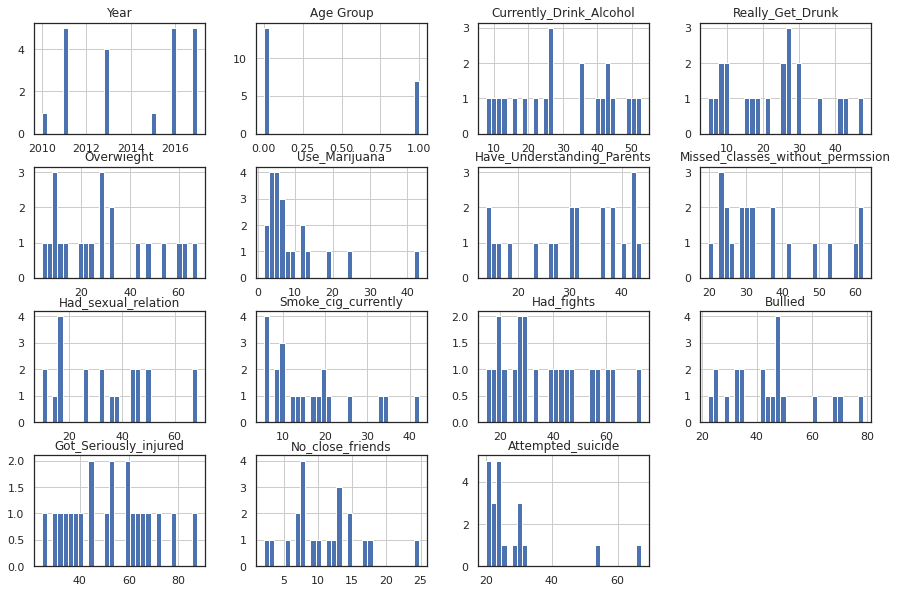

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
suicide20rate_df.hist(bins=30, figsize=(15,10))
plt.show()

### <b>Attempted Suicide Rates < 20 %</b>

In [41]:
notsuicide20rate_df = df[df['Attempted_suicide'] < 20]
#need to label axis on graphs

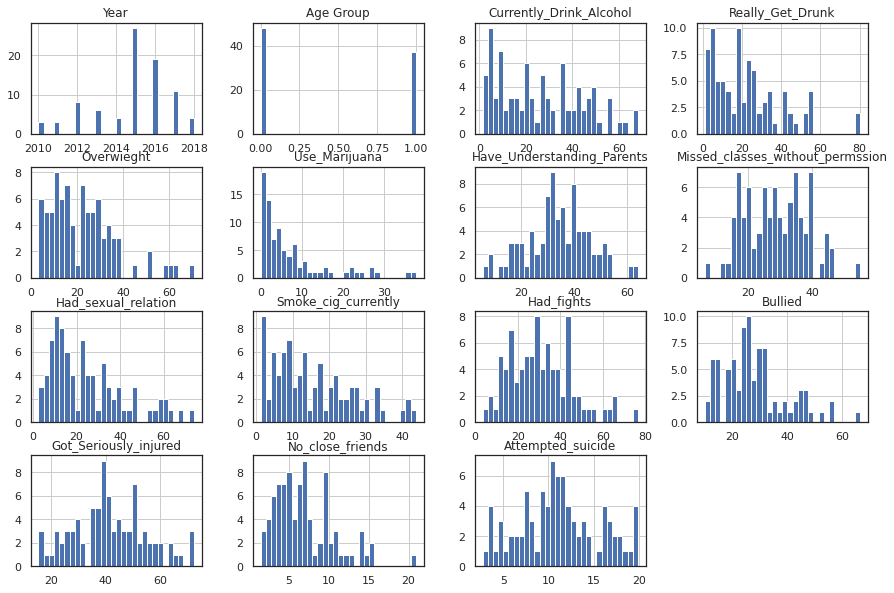

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
notsuicide20rate_df.hist(bins=30, figsize=(15,10))
plt.show()

## <b> Comparisons Report </b>

## Comparison by Year


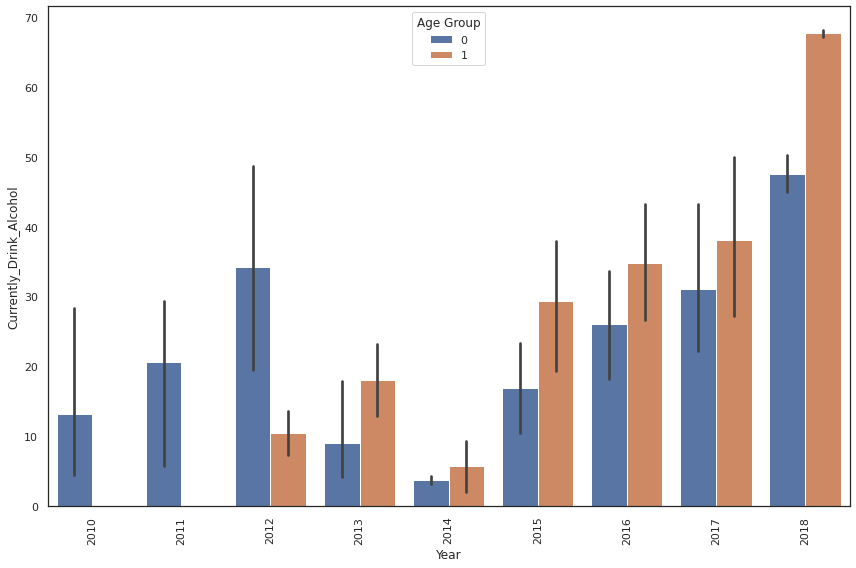

In [43]:
plt.figure(figsize = (12, 8))
sns.barplot(notsuicide20rate_df.Year, notsuicide20rate_df.Currently_Drink_Alcohol, hue = notsuicide20rate_df["Age Group"])
plt.xticks(rotation=90)
plt.tight_layout()

Observation: For the surveys with attempted suicide rate under 20%, those in ages 13-15 have more alcohol consumption in the years 2019-2012, then from there those in ages 16-17 start picking up pace and tend to have a higher alcohol consumption throughout the years to 2018.

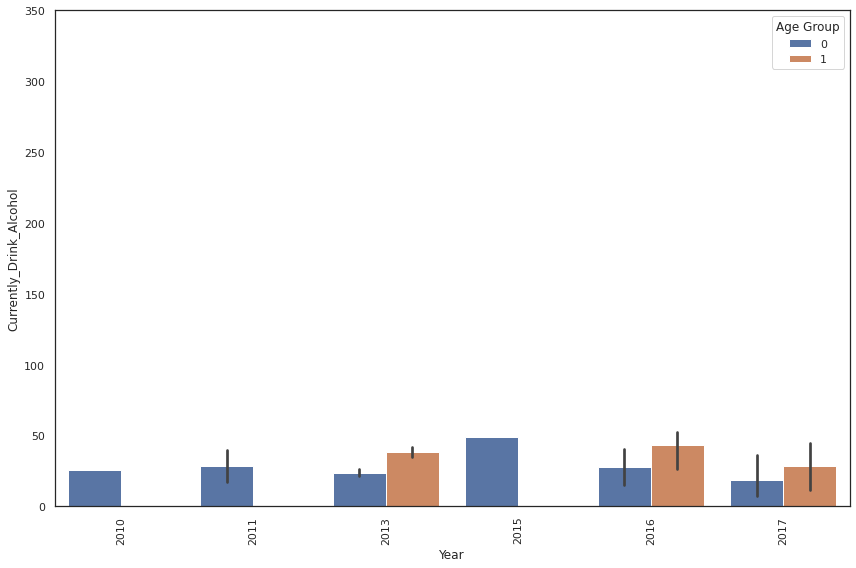

In [44]:
plt.figure(figsize = (12, 8))
plt.ylim(0,350)
sns.barplot(suicide20rate_df.Year, suicide20rate_df.Currently_Drink_Alcohol, hue = suicide20rate_df["Age Group"])
plt.xticks(rotation=90)
plt.tight_layout()

Observation: Overall, we see that those in the age group of 13-15 (0) have a higher tendency of drinking alcohol compared to the group of 16-17. Only in a few instances in the years 2013, 2016 and 2017 is when we see a slight increase in alcohol consumption for those age 16-17 for those surveys with attempted suicide rate over 20%.

## Comparison by Age-groups

> Indented block



In [45]:
sex_by_age_group = suicide20rate_df.pivot_table(index = "Age Group", values = ["Sex"], aggfunc = "count")
sex_by_age_group

,Sex
Age Group,
0,14
1,7


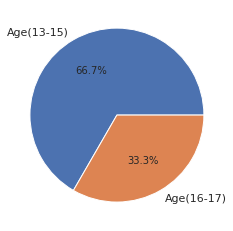

In [46]:
labels = ["Age(13-15)", "Age(16-17)"]
plt.pie(sex_by_age_group["Sex"], labels = labels, autopct='%1.1f%%')
plt.show()

In [47]:
sex_by_age_group1 = notsuicide20rate_df.pivot_table(index = "Age Group", values = ["Sex"], aggfunc = "count")
sex_by_age_group1

,Sex
Age Group,
0,48
1,37


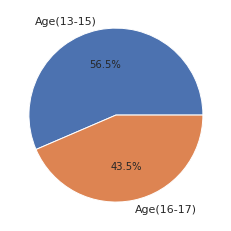

In [48]:
labels = ["Age(13-15)", "Age(16-17)"]
plt.pie(sex_by_age_group1["Sex"], labels = labels, autopct='%1.1f%%')
plt.show()

Observation: Overall, the age group of 13-15 had a higher attempted suicide rate.

## Comparison by Marijuana Usage

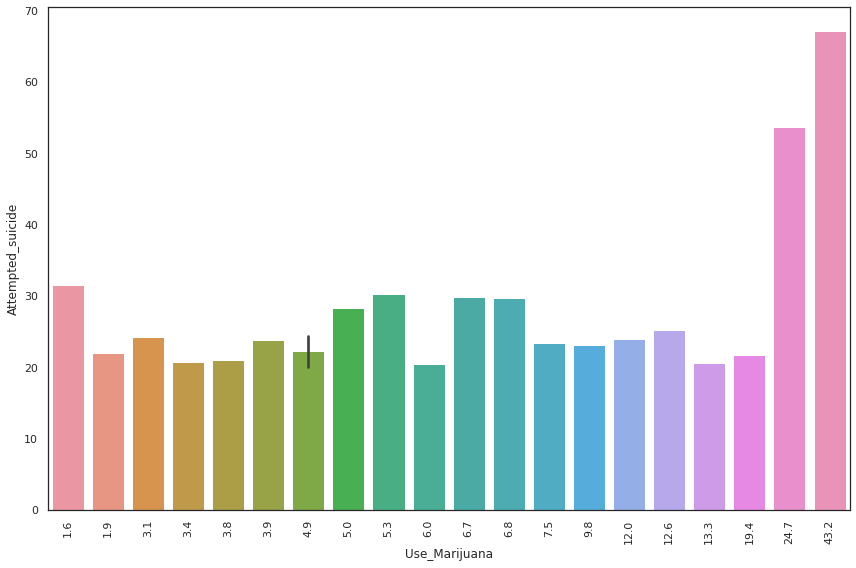

In [49]:
plt.figure(figsize = (12, 8))
sns.barplot(suicide20rate_df.Use_Marijuana, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

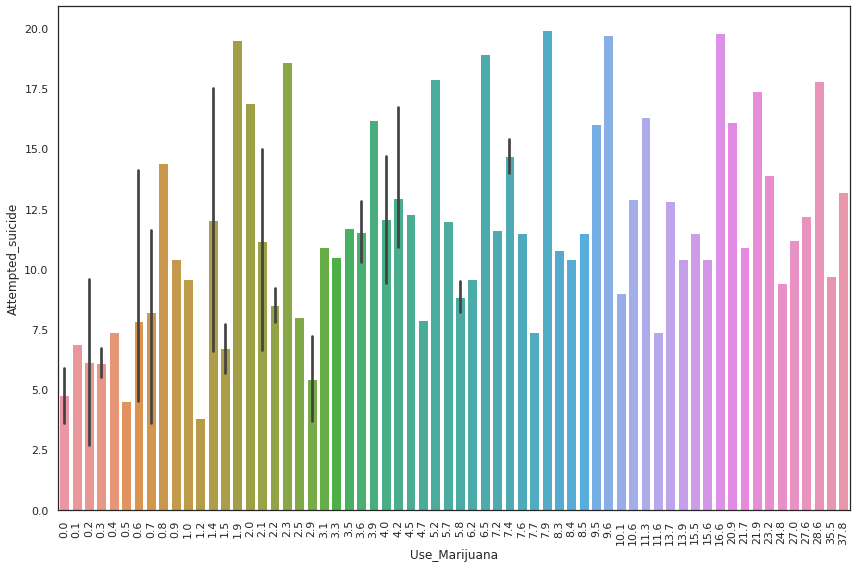

In [50]:
plt.figure(figsize = (12, 8))
sns.barplot(notsuicide20rate_df.Use_Marijuana, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: Those with suicide rate over 20% showed that for the survey that showed a higher percentage og marijuana usage (20% and above) had double the chances of attempted suicide.

## Comparison by bullied variable

> Indented block



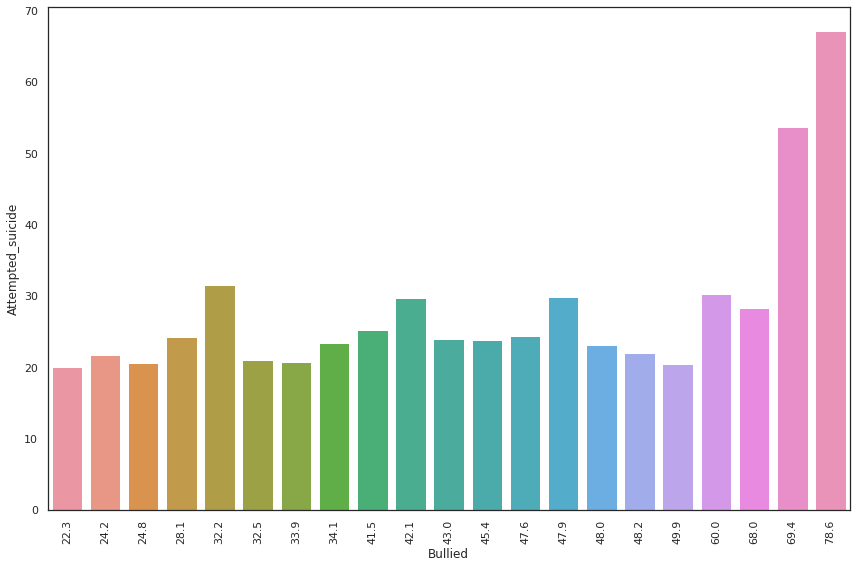

In [51]:
plt.figure(figsize = (12, 8))
sns.barplot(suicide20rate_df.Bullied, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: Those with a bullied rate of 70% and higher had attempted suicide rate by almost double compared to those with less.

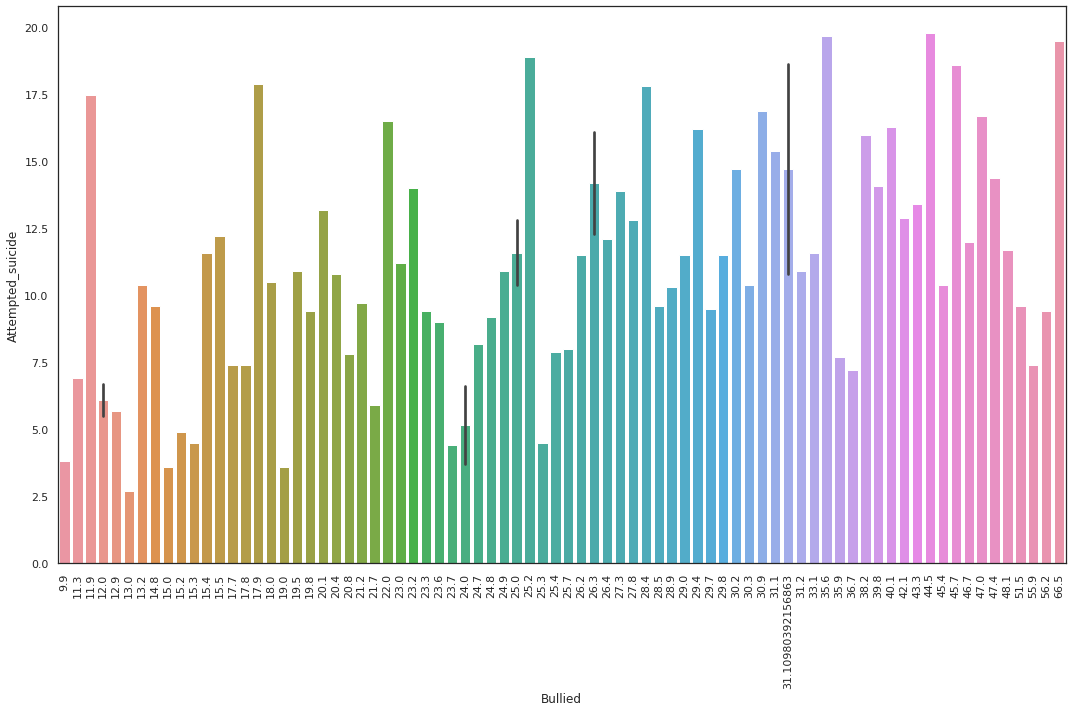

In [52]:
plt.figure(figsize = (15, 10))
sns.barplot(notsuicide20rate_df.Bullied, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: Compared to the surveys with attempted suicide rate over 20%, this analysis shows that those with attempted suicide rate under 20% have lower rates if bulling, hence the lower attempted suicide rates overall. 

## Comparison on had fights

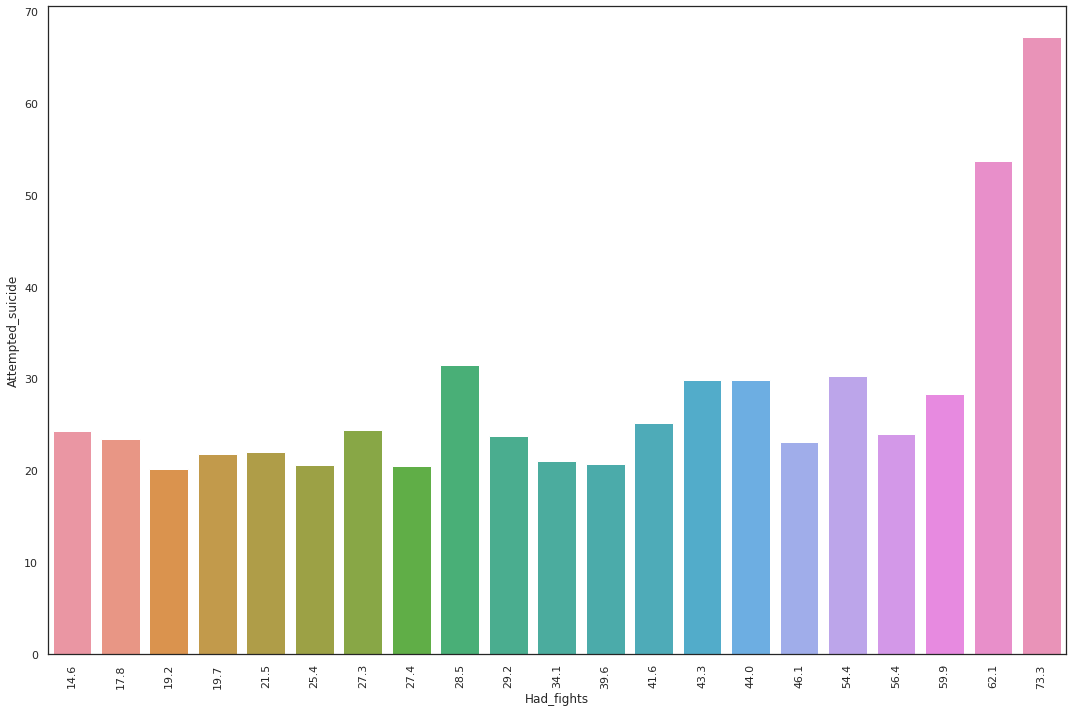

In [53]:
plt.figure(figsize = (15, 10))
sns.barplot(suicide20rate_df.Had_fights, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

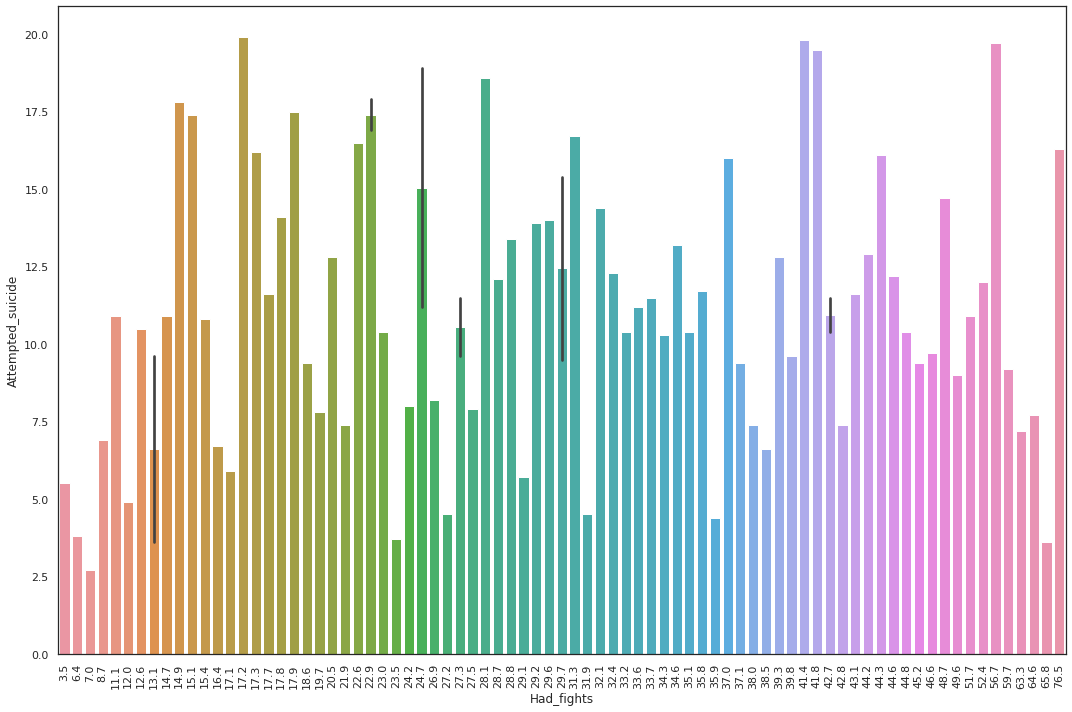

In [54]:
plt.figure(figsize = (15, 10))
sns.barplot(notsuicide20rate_df.Had_fights, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: Those with fights rate of 60% and higher had attempted suicide rate more that 2 times that of surveys with less.

## Comparison of Got Injured


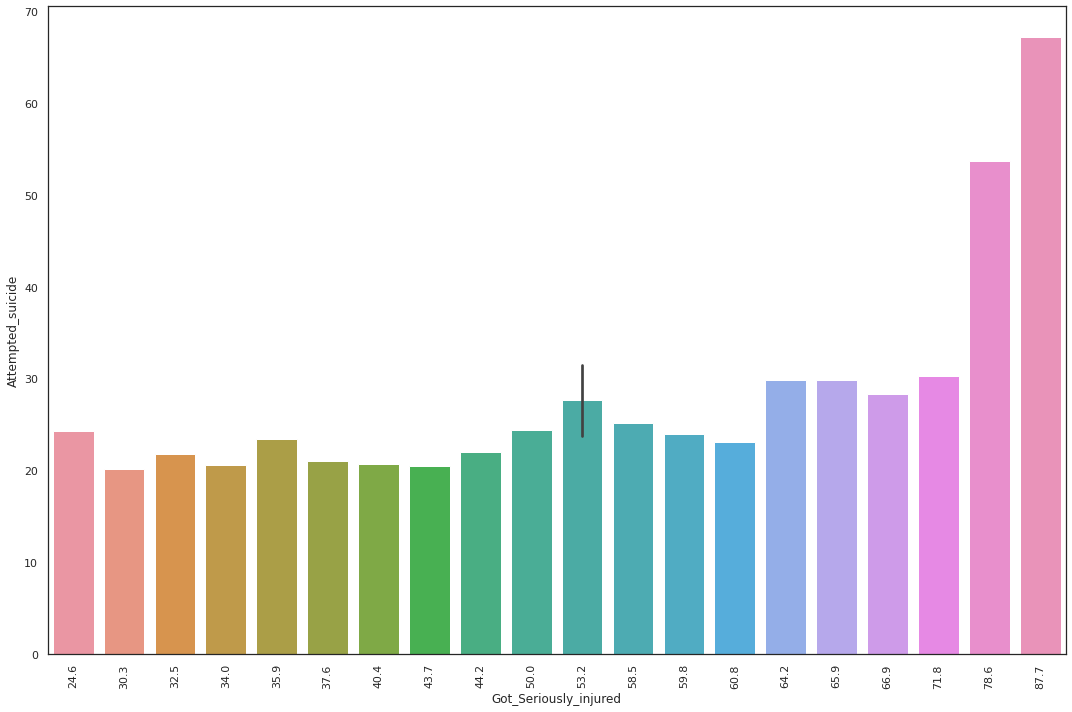

In [55]:
plt.figure(figsize = (15, 10))
sns.barplot(suicide20rate_df.Got_Seriously_injured, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

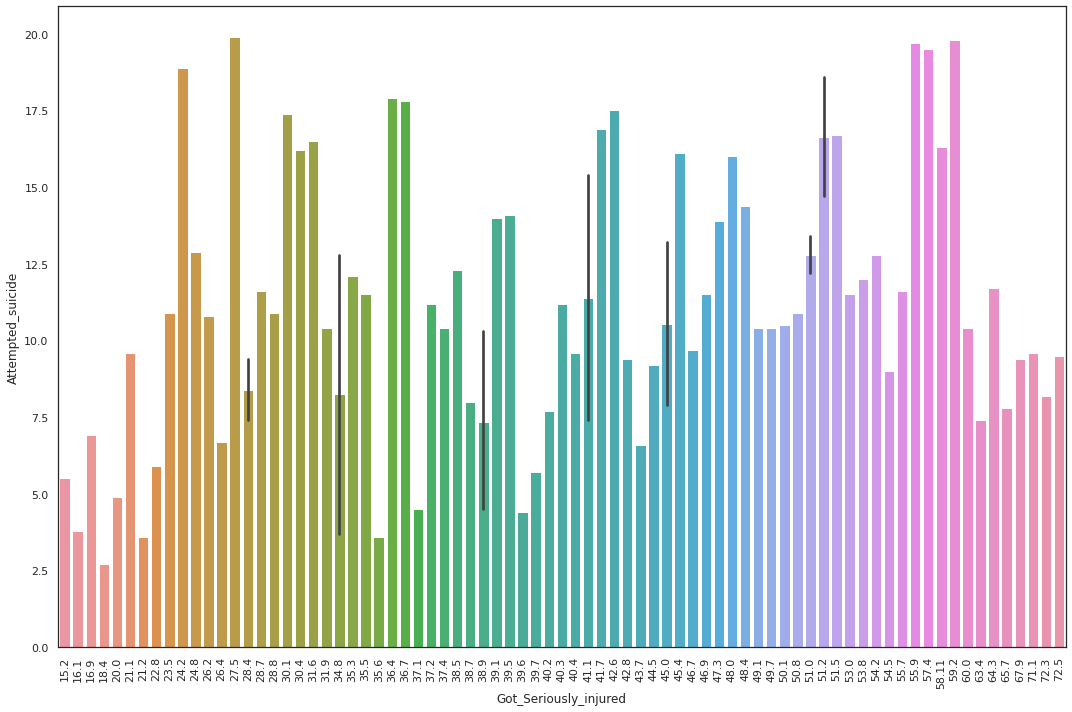

In [56]:
plt.figure(figsize = (15, 10))
sns.barplot(notsuicide20rate_df.Got_Seriously_injured, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: We see a slight increase of those surveys whihc indicated serious injury rate of 64-75%, and then a sharp increase from 78% and above of injury, with a signoficant increase in attempted suicide rate by over 20%.

## Comparison of Smokes Cigarattes

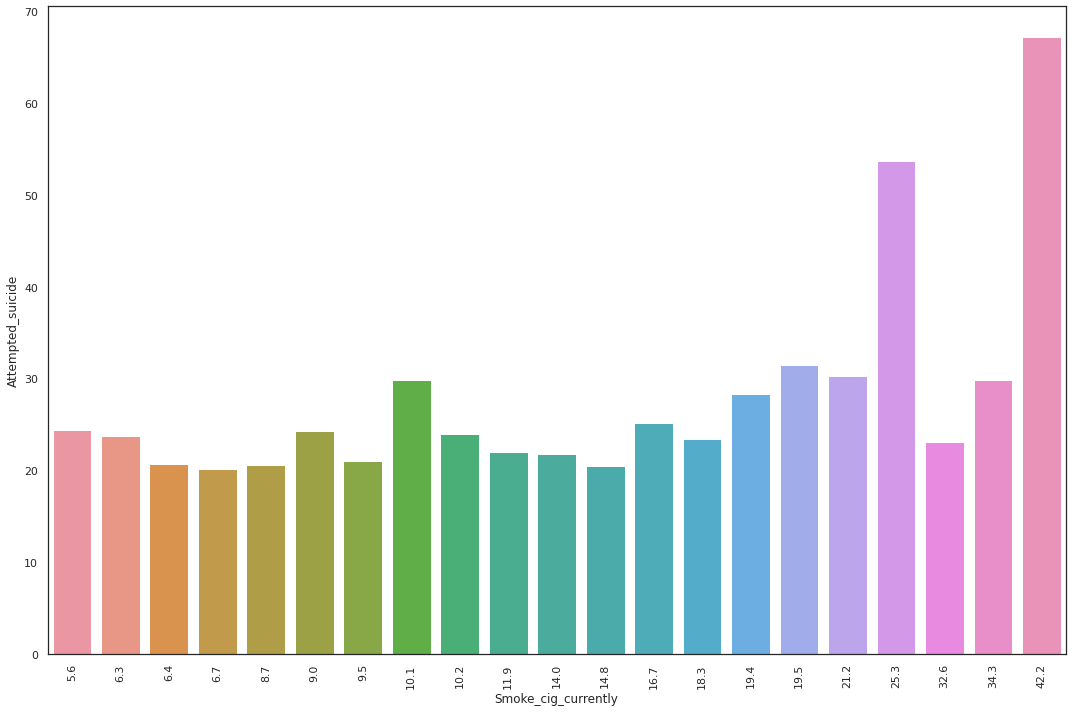

In [57]:
plt.figure(figsize = (15, 10))
sns.barplot(suicide20rate_df.Smoke_cig_currently, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

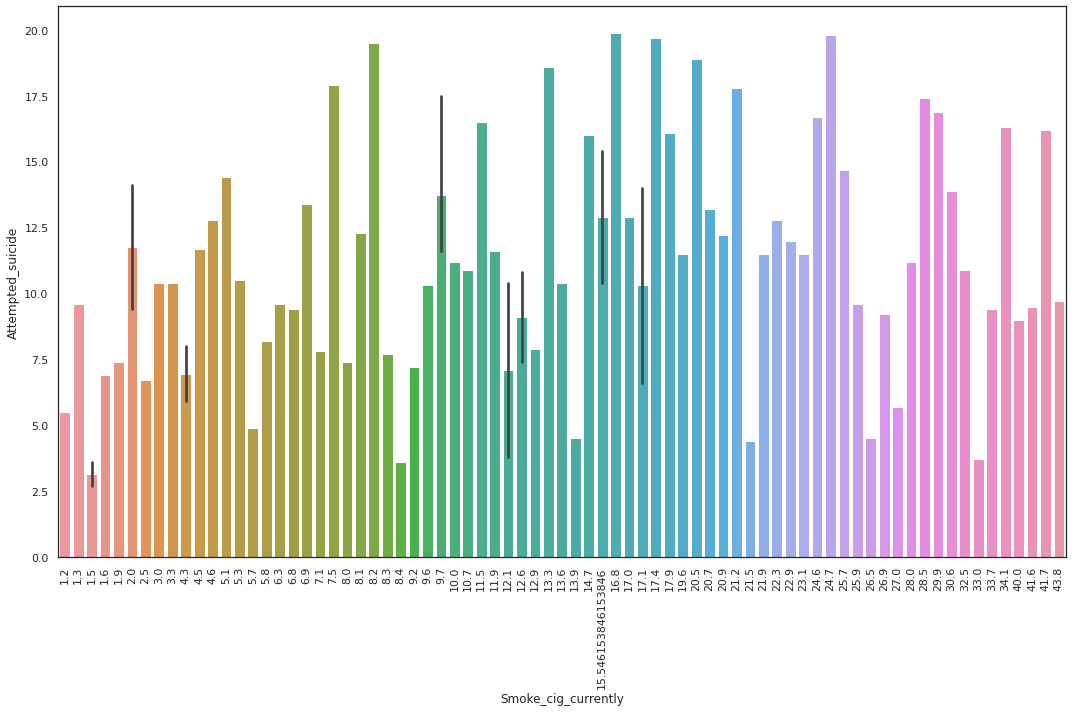

In [58]:
plt.figure(figsize = (15, 10))
sns.barplot(notsuicide20rate_df.Smoke_cig_currently, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: There is not much correlation between attempted suicide and smoking cigarates, except for 2 annomalies, however not enough to show if it is a factor exhibited by those who attempted suicide

## Comparison of Really Getting Drunk


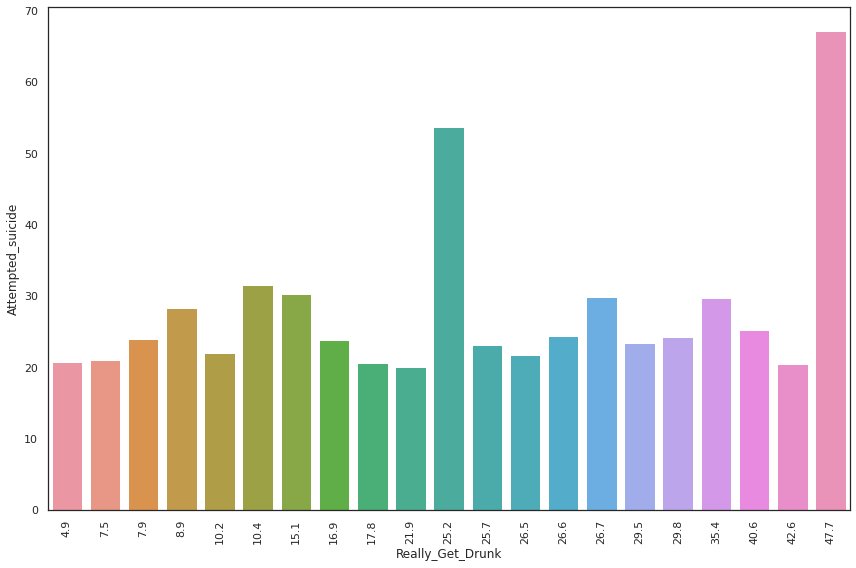

In [59]:
plt.figure(figsize = (12, 8))
sns.barplot(suicide20rate_df.Really_Get_Drunk, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

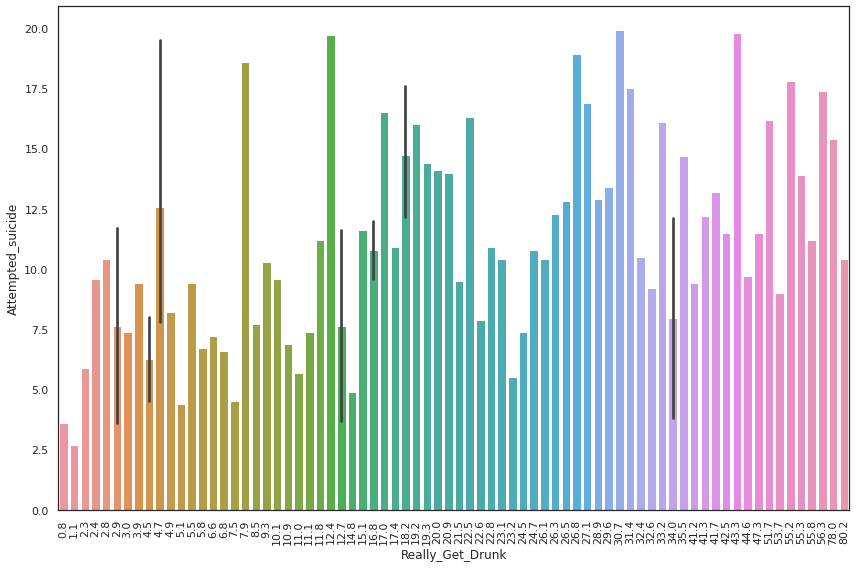

In [60]:
plt.figure(figsize = (12, 8))
sns.barplot(notsuicide20rate_df.Really_Get_Drunk, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: There is not much correlation between attempted suicide and really getting drunk, except for 2 annomalies, however not enough to show if it is a factor exhibited by those who attempted suicide.

## Comparison by Currently Drinking Alcohol


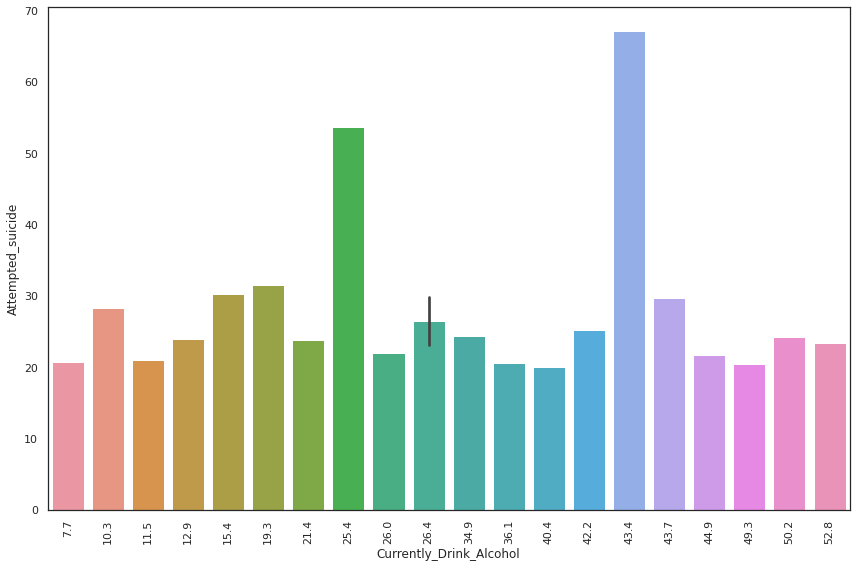

In [61]:
plt.figure(figsize = (12, 8))
sns.barplot(suicide20rate_df.Currently_Drink_Alcohol, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

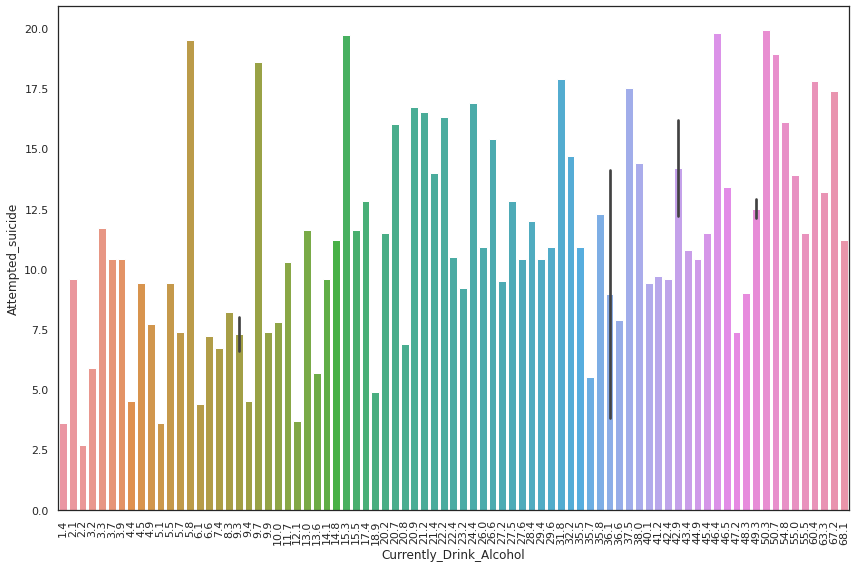

In [62]:
plt.figure(figsize = (12, 8))
sns.barplot(notsuicide20rate_df.Currently_Drink_Alcohol, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: There is not much correlation between attempted suicide and currently drinking alcohol:, except for 2 annomalies, however not enough to show if it is a factor exhibited by those who attempted suicide

##Comparison between all having understanding parents vs attempted suicide

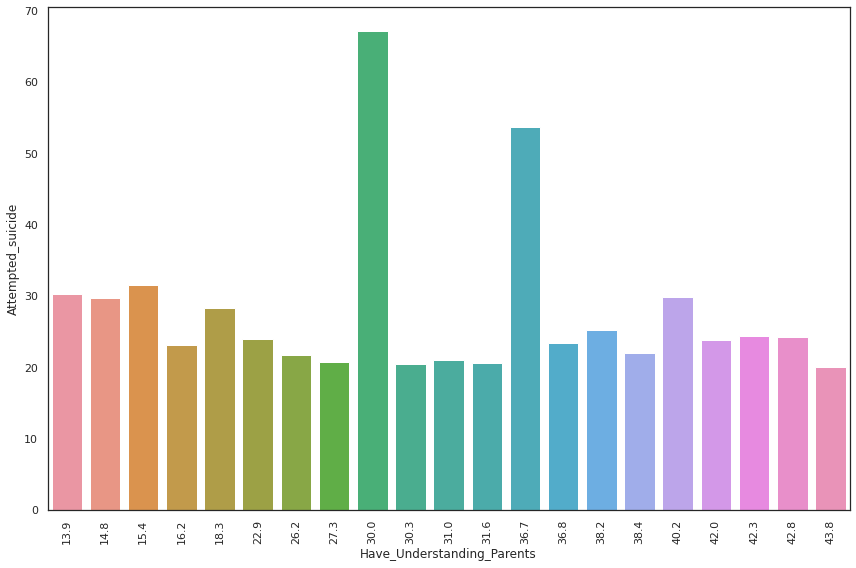

In [63]:
plt.figure(figsize = (12, 8))
sns.barplot(suicide20rate_df.Have_Understanding_Parents, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

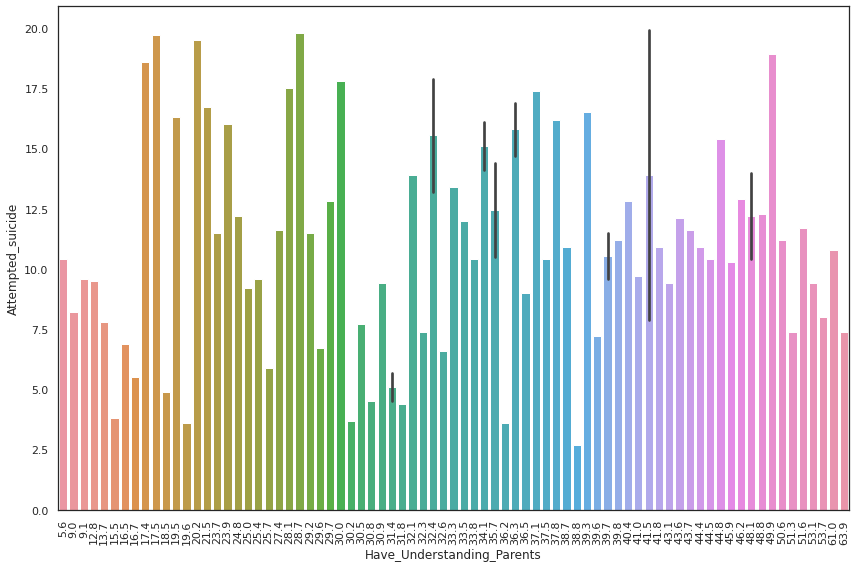

In [64]:
plt.figure(figsize = (12, 8))
sns.barplot(notsuicide20rate_df.Have_Understanding_Parents, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: There is not much correlation between attempted suicide and having understanding parents, except for 2 annomalies, however not enough to show if it is a factor exhibited by those who attempted suicide.

##Comparison between all no close friends vs attempted suicide

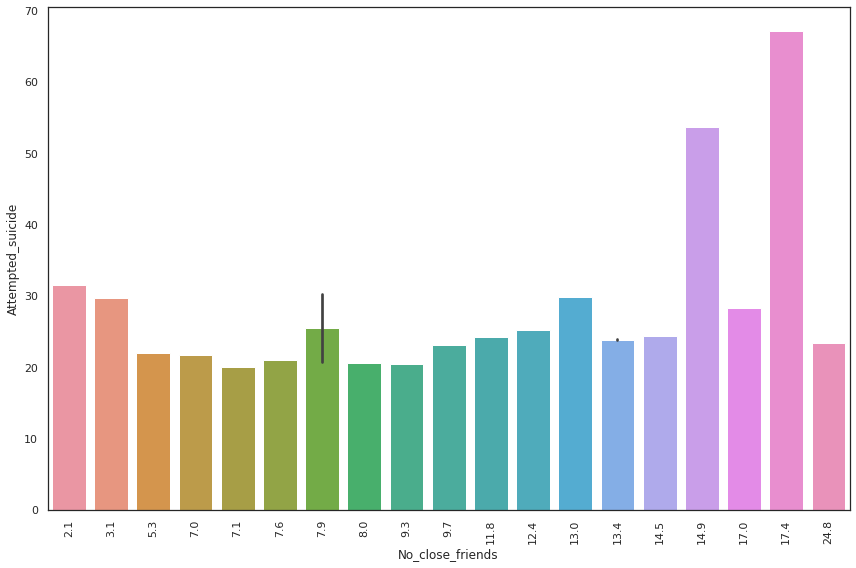

In [65]:
plt.figure(figsize = (12, 8))
sns.barplot(suicide20rate_df.No_close_friends, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

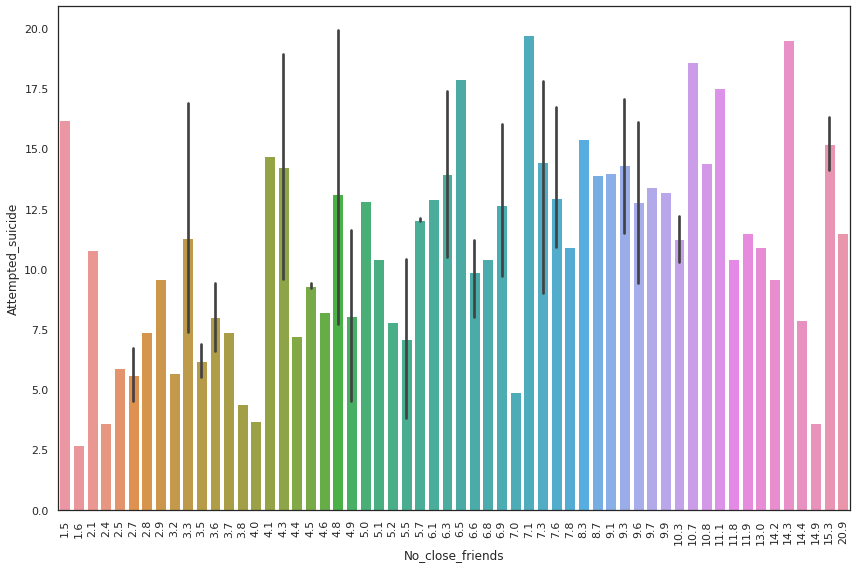

In [66]:
plt.figure(figsize = (12, 8))
sns.barplot(notsuicide20rate_df.No_close_friends, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: There is not much correlation between attempted suicide and no close friends:, except for 2 annomalies, however not enough to show if it is a factor exhibited by those who attempted suicide

##Comparison between sexual relations vs attempted suicide

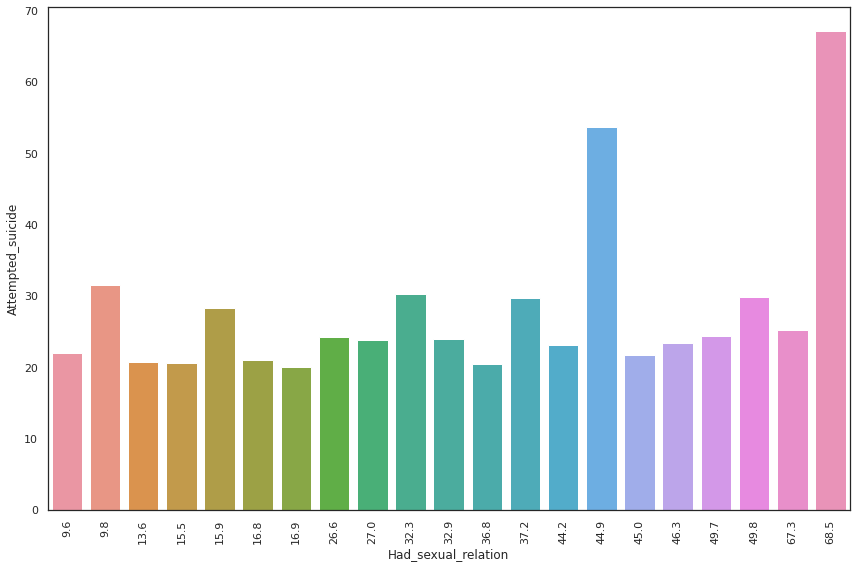

In [67]:
plt.figure(figsize = (12, 8))
sns.barplot(suicide20rate_df.Had_sexual_relation, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

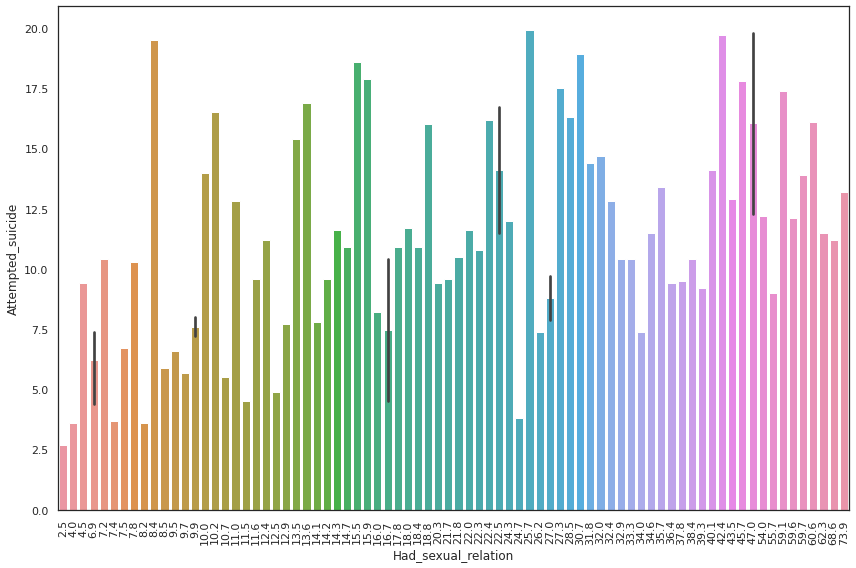

In [68]:
plt.figure(figsize = (12, 8))
sns.barplot(notsuicide20rate_df.Had_sexual_relation, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: There is not much correlation between attempted suicide and having sexual relations:, except for 2 annomalies, however not enough to show if it is a factor exhibited by those who attempted suicide

##Comparison between all sex vs attempted suicide

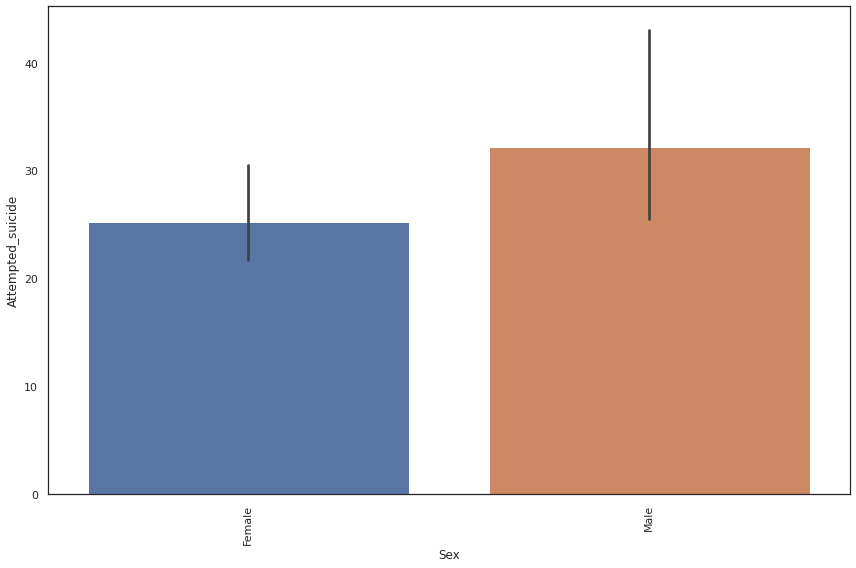

In [69]:
# Attempted suicide over 20%
plt.figure(figsize = (12, 8))
sns.barplot(suicide20rate_df.Sex, suicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

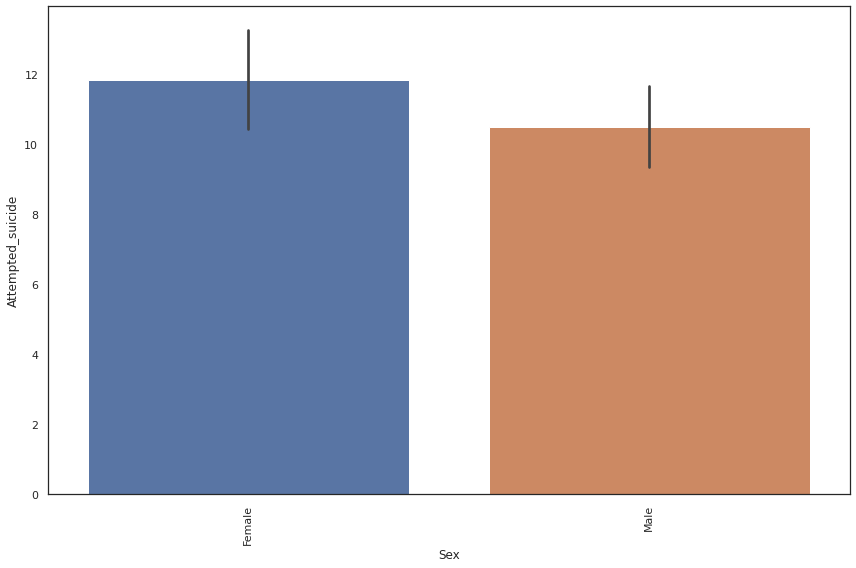

In [70]:
# Attempted suicide under 20%
plt.figure(figsize = (12, 8))
sns.barplot(notsuicide20rate_df.Sex, notsuicide20rate_df.Attempted_suicide)
plt.xticks(rotation=90)
plt.tight_layout()

Observation: We see that though from our initial analysis of considering the entire dataset, females had a higher attempted suicide than men, when we look at those surveys with attempted suicide rate over 20% men had a slightly higher percent than women.

## Results

Based on the surveys analysis conducted, we determined that while there are more females ooverall in the surveys collected, there were in fact more males who attempted suicide compared to females for those surveys with a higher attempted suicide rate. Moreover, of the 2 ages groups, that of 13-15 reported the most suicide attempts. Countries with the highest attempted suicide rates are Samoa, Kiribati and Namibia. 

Below are the behaviors that have the highest contribution to attempted suicide

*   Marijuana usage
*   Getting into fights
*   Being bullied
*   Getting seriously injured




